In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#uploading data
dt = pd.read_csv("./prostate.csv")

In [3]:
#Visualization part
dt.head(10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319


In [4]:
max(dt['svi'])



1

In [5]:
import seaborn as sns

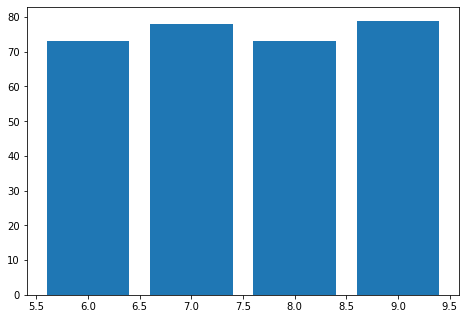

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
glseason = dt['gleason']
age = dt['age']
ax.bar(glseason,age)
plt.show()

In [7]:
max(dt['gleason'])

9

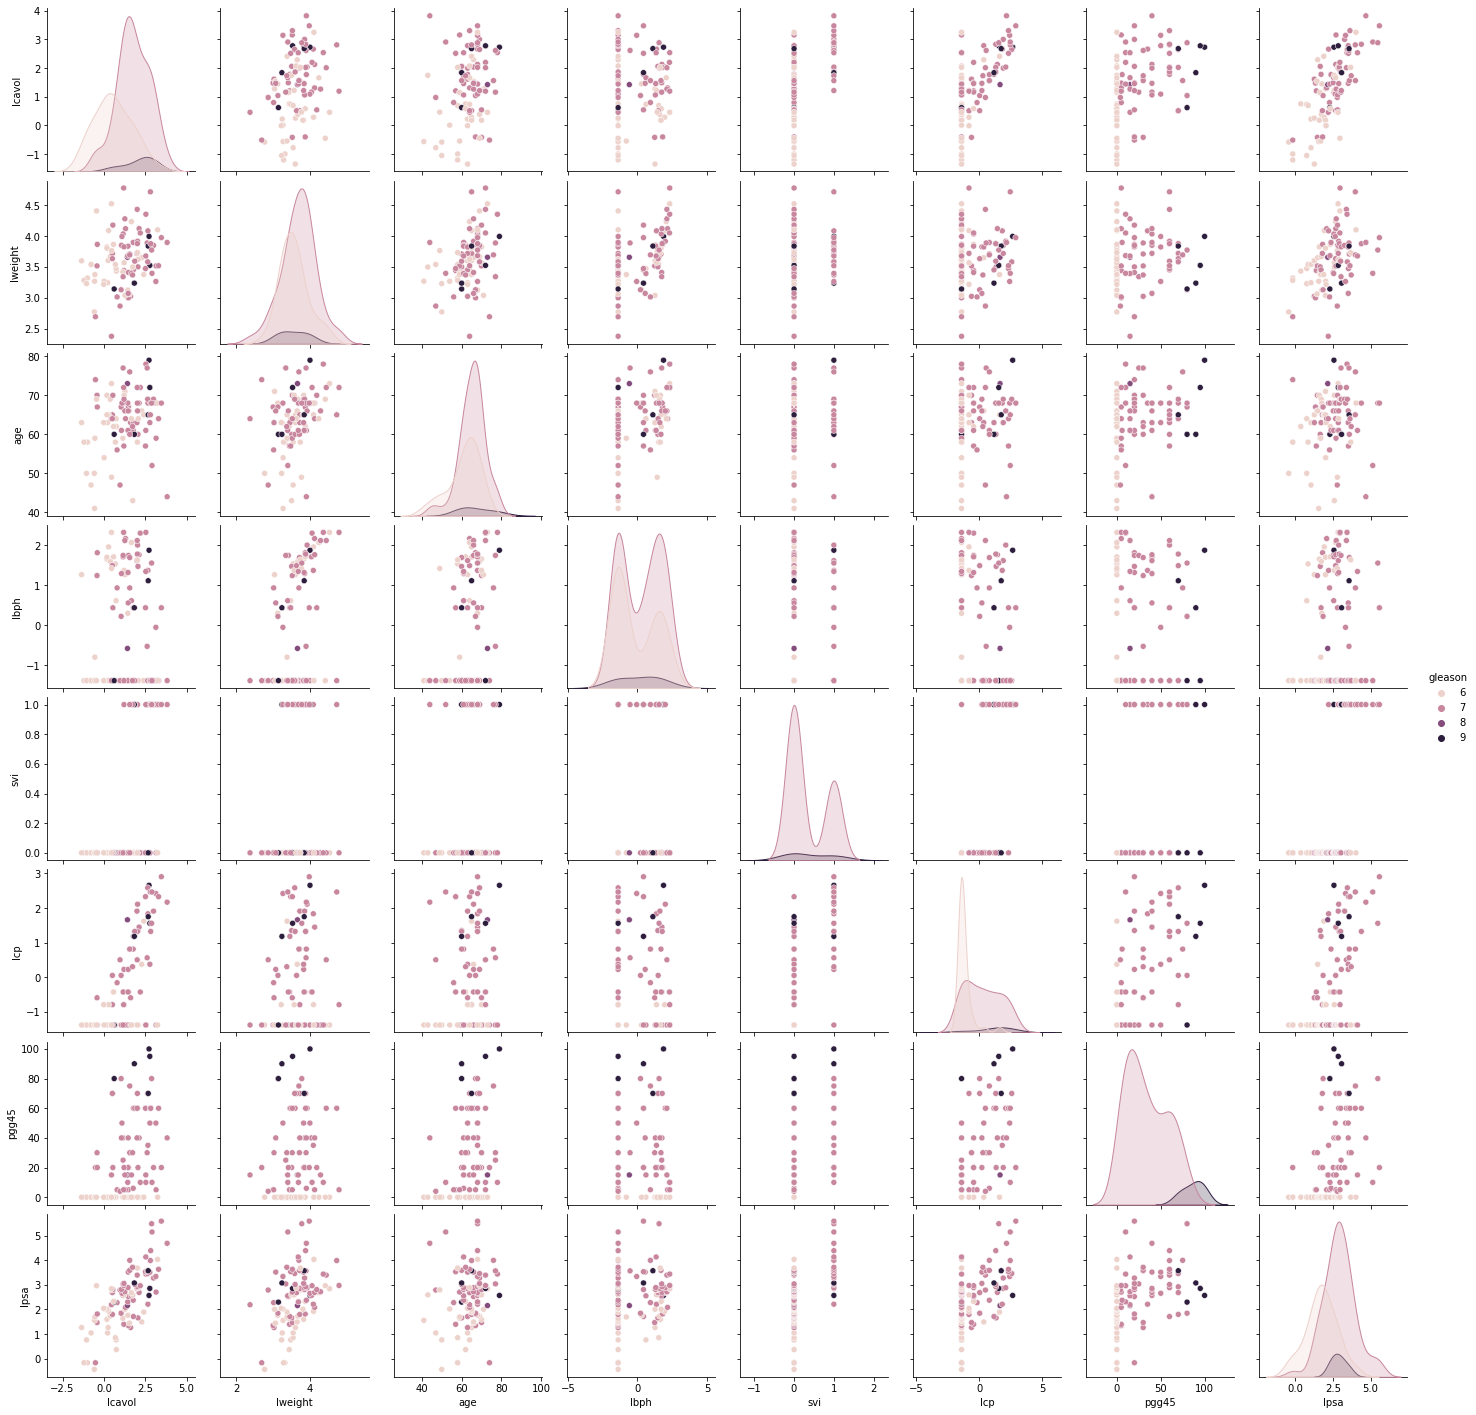

In [8]:
sns.pairplot(dt,hue = 'gleason')

In [9]:
#we are going to redict gleason from rest of the data


from sklearn.model_selection import train_test_split

X = dt.drop(['gleason'],axis = 1)
y = dt['gleason']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
len(x_train)

67

In [18]:
len(x_test)

30

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# k = 3 here, By default it uses euclidean distance method
neigh = KNeighborsClassifier(n_neighbors=3)

In [21]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
#now computer accuracy score
neigh.score(x_test,y_test)

0.9

In [23]:
# acccuracy score is 0.9
from sklearn.metrics import confusion_matrix

#now we will plot confusion matrix based on our prediction

y_pred = neigh.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

In [24]:
print(cm)

[[ 7  0  0  0]
 [ 1 19  0  0]
 [ 0  1  0  0]
 [ 0  1  0  1]]


Text(42.0, 0.5, 'truth')

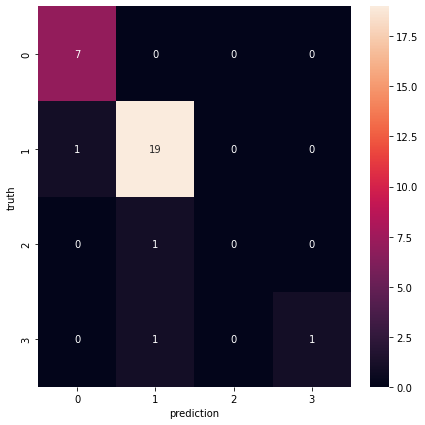

In [25]:
#now plotting confusion_matrix
# total 30 prediction were there , diagonal are right prediction for that class and non-diagonal are wrong 
# prediction in confusion matrix
plt.figure(figsize=(7,7))

sns.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')


In [26]:
from sklearn.metrics import classification_report

clr = classification_report(y_test,y_pred)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gaura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gaura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
print(clr)

              precision    recall  f1-score   support

           6       0.88      1.00      0.93         7
           7       0.90      0.95      0.93        20
           8       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2

    accuracy                           0.90        30
   macro avg       0.69      0.61      0.63        30
weighted avg       0.87      0.90      0.88        30

